In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,ShuffleSplit




# Load the Iris dataset
iris = load_iris()



In [2]:
iris.data.shape

(150, 4)

In [3]:
pd.DataFrame(iris.data).isnull().sum().sum()

0

In [4]:
pd.DataFrame(iris.data).dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

In [5]:
# check is dataset normalized
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X = StandardScaler().fit_transform(iris.data)
y = iris.target

In [7]:
pd.DataFrame(X).describe()
# as it is clear mean is 0 and std is 1, so the dataset is normalized

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [8]:

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=72)


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Fit the model on the training data


KNeighborsClassifier()

In [10]:
knn.score(X_train, y_train) # Evaluate the model on the train data

0.9658119658119658

In [11]:
knn.score(X_test, y_test)  # Evaluate the model on the test data

0.9696969696969697

In [12]:
params = {
    'n_neighbors': range(1,22,2),
    'weights': ['uniform', 'distance']
    }
cv = ShuffleSplit(n_splits=3, test_size=0.22, random_state=72)
grid_search = GridSearchCV(knn, param_grid=params, cv=cv,return_train_score=True,verbose=10)
grid_search.fit(X_train, y_train)  # Fit the model on the training data

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV 1/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 1/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.962) total time=   0.0s
[CV 2/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 2/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.923) total time=   0.0s
[CV 3/3; 1/22] START n_neighbors=1, weights=uniform.............................
[CV 3/3; 1/22] END n_neighbors=1, weights=uniform;, score=(train=1.000, test=0.846) total time=   0.0s
[CV 1/3; 2/22] START n_neighbors=1, weights=distance............................
[CV 1/3; 2/22] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.962) total time=   0.0s
[CV 2/3; 2/22] START n_neighbors=1, weights=distance............................
[CV 2/3; 2/22] END n_neighbors=1, weights=distance;, score=(train=1.000, test=0.923) total time=   0.0s
[CV 3/3; 2/22] ST

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=72, test_size=0.22, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 22, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=10)

In [13]:
print("best_params",grid_search.best_params_)  # Get the best parameters from the grid search
print("best_Score (train score)",grid_search.cv_results_["mean_train_score"][grid_search.best_index_] )  # Get the best training score from the grid search
print("best_Score (test score)",grid_search.cv_results_["mean_test_score"][grid_search.best_index_] )  # Get the best test score from the grid search


best_params {'n_neighbors': 17, 'weights': 'uniform'}
best_Score (train score) 0.9450549450549449
best_Score (test score) 0.9615384615384616


In [14]:
mean_train_score = grid_search.cv_results_["mean_train_score"]
mean_test_score =  grid_search.cv_results_["mean_test_score"]

In [15]:
index_min_diff= (abs(mean_train_score - mean_test_score)).argmin()

In [16]:
grid_search.cv_results_["params"][index_min_diff] # Get the parameters with the minimum difference between train and test score


{'n_neighbors': 15, 'weights': 'uniform'}

In [17]:
grid_search.cv_results_["mean_train_score"][index_min_diff] # Get the train score with the minimum difference between train and test score

0.9487179487179486

In [18]:
grid_search.cv_results_["mean_test_score"][index_min_diff] # Get the test score with the minimum difference between train and test score

0.9487179487179488

There is no overfitting with the parameters {'n_neighbors': 15, 'weights': 'uniform'} for sure.

However, there is a slight overfit with the best parameters {'n_neighbors': 17, 'weights': 'uniform'}.

Therefore, I prefer to use {'n_neighbors': 15, 'weights': 'uniform'} because I would rather avoid any overfitting.

In [19]:

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=72)


In [20]:
svm = SVC(kernel='linear', C=1.0, random_state=72)
svm.fit(X_train, y_train)  # Fit the model on the training data

SVC(kernel='linear', random_state=72)

In [21]:
svm.score(X_train, y_train) # Evaluate the model on the train data

0.9642857142857143

In [22]:
svm.score(X_test, y_test)  # Evaluate the model on the test data

0.9545454545454546

In [23]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']}

In [24]:
# cv = ShuffleSplit(n_splits=3, test_size=0.22, random_state=72)
svm_grid_search= GridSearchCV(svm, param_grid=params, cv=cv,return_train_score=True,verbose=10)
svm_grid_search.fit(X_train, y_train)  # Fit the model on the training data

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 1/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.969, test=0.947) total time=   0.0s
[CV 2/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 2/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.969, test=0.947) total time=   0.0s
[CV 3/3; 1/32] START C=0.1, gamma=scale, kernel=linear..........................
[CV 3/3; 1/32] END C=0.1, gamma=scale, kernel=linear;, score=(train=0.954, test=0.947) total time=   0.0s
[CV 1/3; 2/32] START C=0.1, gamma=scale, kernel=poly............................
[CV 1/3; 2/32] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.800, test=0.737) total time=   0.0s
[CV 2/3; 2/32] START C=0.1, gamma=scale, kernel=poly............................
[CV 2/3; 2/32] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.754, test=0.895) total time=   0.0s
[CV 3/3;

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=72, test_size=0.22, train_size=None),
             estimator=SVC(kernel='linear', random_state=72),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=10)

In [25]:
svm_grid_search.best_params_  # Get the best parameters from the grid search

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [26]:
svm_grid_search.best_score_

0.9649122807017543

In [27]:
svm_train_scores = svm_grid_search.cv_results_['mean_train_score']

In [28]:
svm_test_scores = svm_grid_search.cv_results_['mean_test_score']


In [29]:
diff_scores = abs(svm_train_scores - svm_test_scores)
index_mean_diff_svm_scores =diff_scores.argmin()

In [30]:
svm_grid_search.cv_results_["params"][index_mean_diff_svm_scores] # Get the parameters with the minimum difference between train and test score

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [31]:
svm_grid_search.cv_results_["mean_train_score"][index_mean_diff_svm_scores] 

0.876923076923077

In [32]:
svm_grid_search.cv_results_["mean_test_score"][index_mean_diff_svm_scores]

0.8771929824561403

In [33]:
svm_scores = {"train_scores":svm_train_scores,
                "test_scores":svm_test_scores,
                "diff_scores":diff_scores,
                "params":svm_grid_search.cv_results_["params"],
                }

In [34]:
svm_scores_df = pd.DataFrame(svm_scores).sort_values(by="diff_scores", ascending=True).reset_index(drop=True)
svm_scores_df

,train_scores,test_scores,diff_scores,params
0,0.876923,0.877193,0.000270,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}"
1,0.969231,0.964912,0.004318,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}"
2,0.969231,0.964912,0.004318,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
3,0.969231,0.964912,0.004318,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
4,0.974359,0.964912,0.009447,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}"
5,0.979487,0.964912,0.014575,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}"
6,0.979487,0.964912,0.014575,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
7,0.892308,0.877193,0.015115,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}"
8,0.964103,0.947368,0.016734,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
9,0.964103,0.947368,0.016734,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"


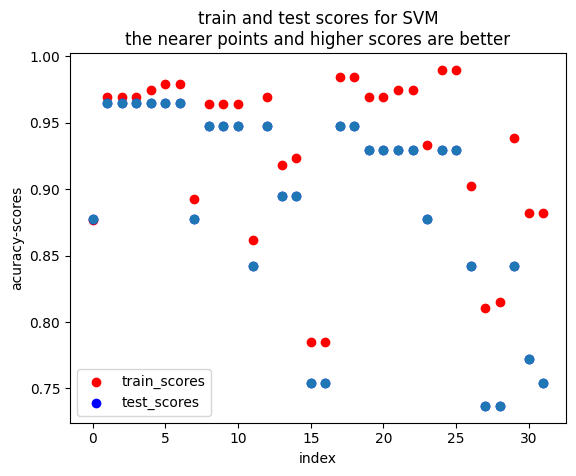

In [35]:
plt.scatter(range(len(svm_scores_df["train_scores"])),svm_scores_df["train_scores"],color="red",label="train_scores")
plt.scatter(range(len(svm_scores_df["test_scores"])),svm_scores_df["test_scores"],color="blue",label="test_scores")
plt.scatter(range(len(svm_scores_df["test_scores"])),svm_scores_df["test_scores"])
plt.ylabel("acuracy-scores")
plt.xlabel("index")
plt.title("train and test scores for SVM\nthe nearer points and higher scores are better")
plt.legend()
plt.show()

### I think the result below is the best score (while avoiding overfit) in svm

In [ ]:
svm_scores_df[6:7]

,train_scores,test_scores,diff_scores,params
6,0.979487,0.964912,0.014575,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
